In [93]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv
import os.path

Task 1

In [3]:
dfSPPrice= pd.concat(map(pd.read_csv, ['ERCOT_DA_Prices_2016.csv', 'ERCOT_DA_Prices_2017.csv','ERCOT_DA_Prices_2018.csv','ERCOT_DA_Prices_2019.csv']))
dfSPPrice['Date']=pd.to_datetime(dfSPPrice['Date'])
dfSPPrice.set_index('Date', inplace=True)

Task 2 and 3

In [4]:
setPointUniq=dfSPPrice.SettlementPoint.unique() #select all unique Settlement Points
APBM= pd.DataFrame(columns = ['SettlementPoint', 'Year', 'Month', 'AveragePrice']) #Create data frame for processed data
for i in range(len(setPointUniq)): #cycle through unique Settlement Points
    monthAVG=dfSPPrice[dfSPPrice.SettlementPoint==setPointUniq[i]]['Price'].resample('M').mean()
    #first set of brackets grabs only the location specific data, second just the price from that data.
    #The third command sorts month sized groups of data, and the final command finds the average for each month and stores in an array
    for j in range(len(monthAVG)): #loop responsible for populating new data frame
        #stores all new info into a dictionary that can be appended to a data frame
        newRow={'SettlementPoint': setPointUniq[i], 'Year': monthAVG.index[j].year, 'Month': monthAVG.index[j].month, 'AveragePrice': monthAVG[j]} 
        APBM = APBM.append(newRow, ignore_index = True) 
APBM.to_csv('AveragePriceByMonth.csv')

Bonus Plots for Section 1

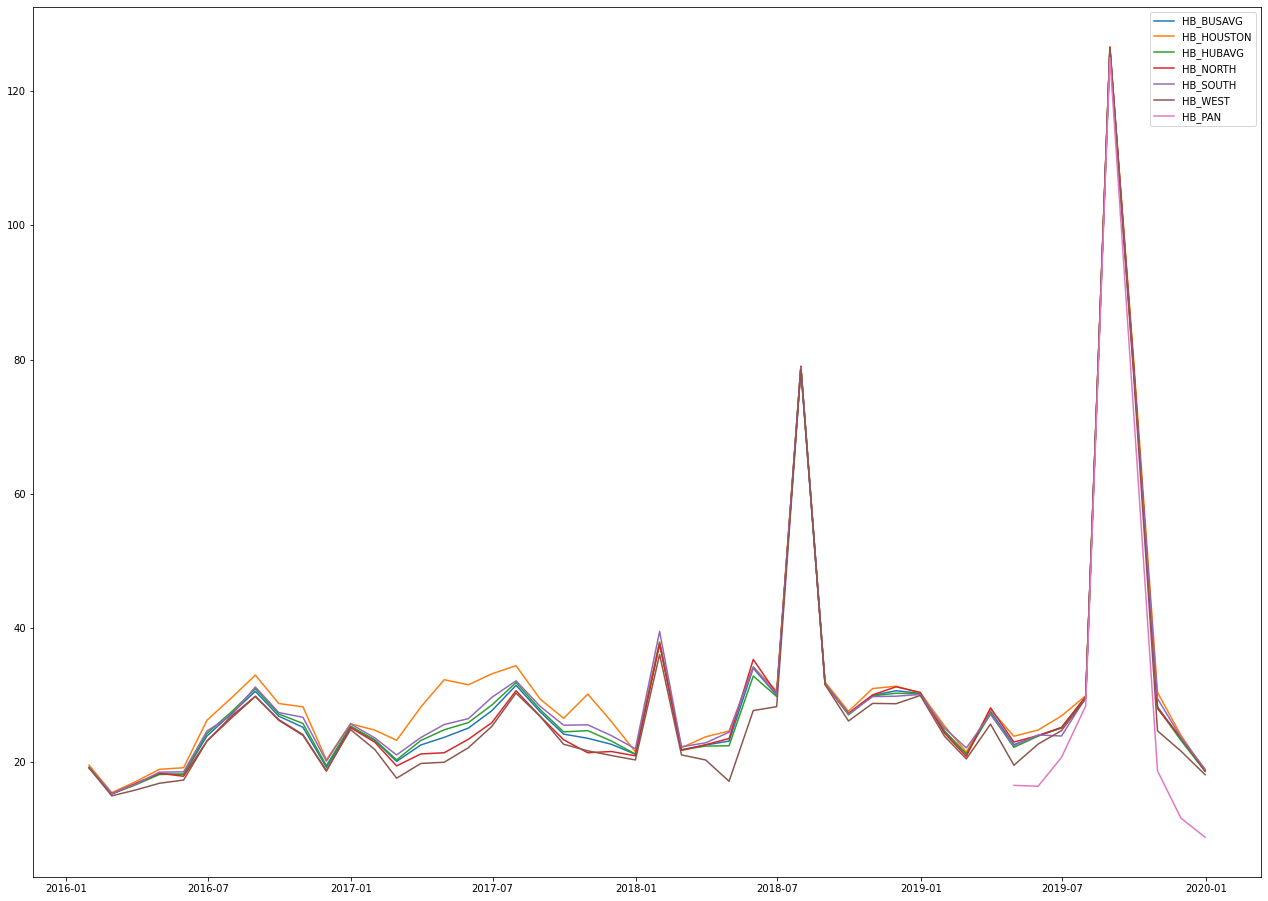

In [111]:
fig = plt.figure(figsize=(22, 16))
for i in range(len(setPointUniq)): #sort through unique settlement locations
    if setPointUniq[i][0:2]=='HB': #sort for only hubs
        #find start date
        start=str(APBM[APBM.SettlementPoint==setPointUniq[i]].iloc[0,1])+'-0'+str(APBM[APBM.SettlementPoint==setPointUniq[i]].iloc[0,2])
        end='2020-01'
        #gives every month within the time range stored as a pandas data type
        xvals=pd.date_range(start, end, freq='M')
        yvals=APBM[APBM.SettlementPoint==setPointUniq[i]]['AveragePrice']
        plt.plot(xvals,yvals, label=setPointUniq[i])
        plt.legend()
fig.savefig('SettlementHubAveragePriceByMonth.png')

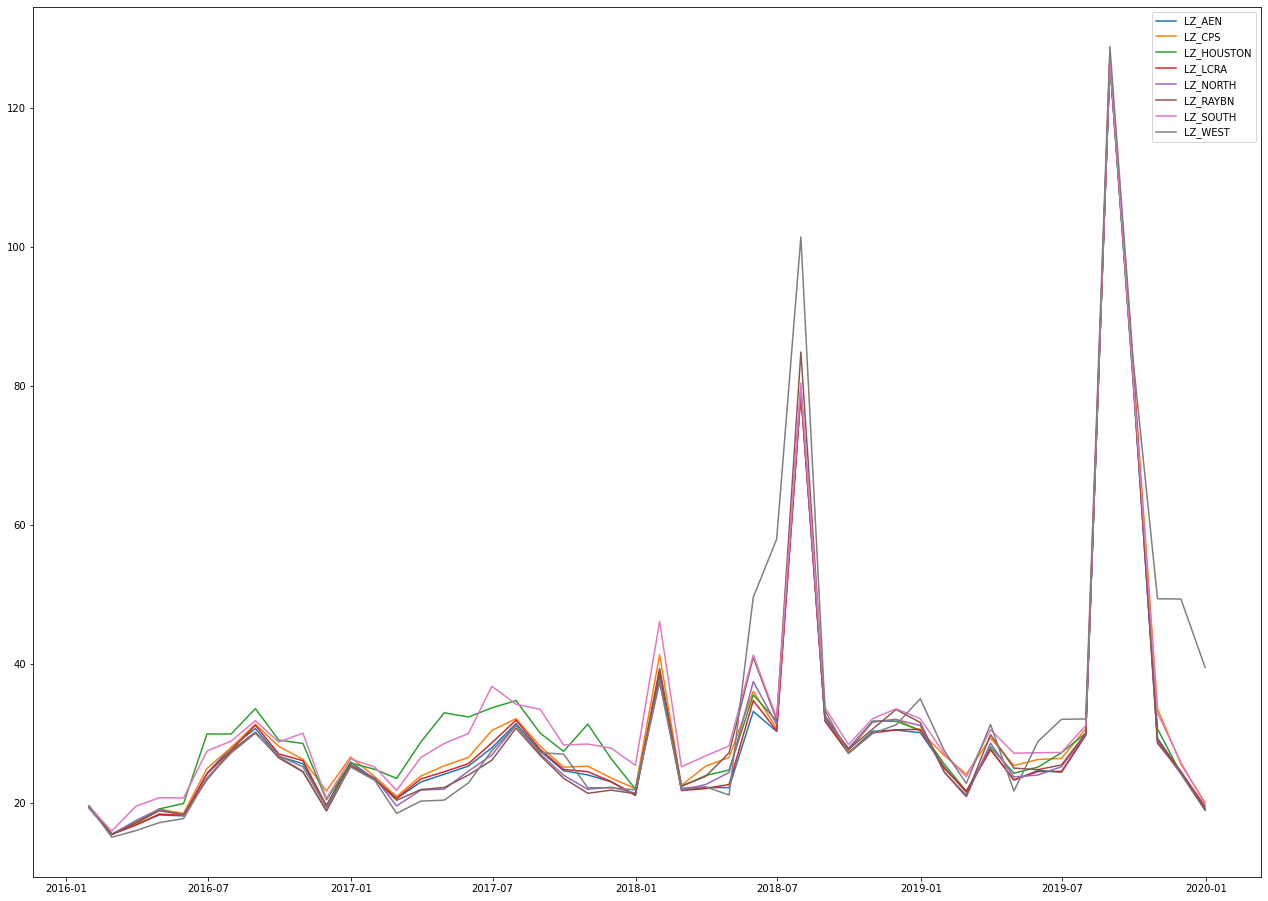

In [113]:
fig = plt.figure(figsize=(22, 16))
for i in range(len(setPointUniq)):
    if setPointUniq[i][0:2]=='LZ': #sort for only load zones
        start=str(APBM[APBM.SettlementPoint==setPointUniq[i]].iloc[0,1])+'-0'+str(APBM[APBM.SettlementPoint==setPointUniq[i]].iloc[0,2])
        end='2020-01'
        xvals=pd.date_range(start, end, freq='M')
        yvals=APBM[APBM.SettlementPoint==setPointUniq[i]]['AveragePrice']
        plt.plot(xvals,yvals, label=setPointUniq[i])
        plt.legend()
fig.savefig('LoadZoneAveragePriceByMonth.png')



Task 4

In [114]:
setPointHub=[]
for i in range(len(setPointUniq)): #sort for only hubs
    if setPointUniq[i][0:2]=='HB':
        setPointHub.append(setPointUniq[i])
dfHub=pd.DataFrame()
for i in range(len(setPointHub)): #construct only hub data frame
    dfHub=dfHub.append(dfSPPrice[dfSPPrice.SettlementPoint==setPointHub[i]])
dfHub.reset_index(inplace=True)
for i in range(len(dfHub)): #sort out negative and 0 values
    if(dfHub.Price[i]<=0):
        dfHub=dfHub.drop(i)
dfHub.set_index('Date', inplace=True)

Task 4 and 5

In [116]:
HVBY= pd.DataFrame(columns = ['SettlementPoint', 'Year', 'HourlyVolatility'])
for k in range(len(setPointHub)): #iterate through hubs
    
    yearMin=dfHub[dfHub.SettlementPoint==setPointHub[k]].index.min().year #these error bounds are to protect agains incomplete data
    yearMax=(dfHub[dfHub.SettlementPoint==setPointHub[k]].index.max().year)+1
    for year in range(yearMin, yearMax):
        curHubYear=dfHub[dfHub.SettlementPoint==setPointHub[k]]['Price'][str(year)]
        logRet=[]
        for i in range(len(curHubYear)-1):
            logRet.append(np.log(curHubYear[i+1]/curHubYear[i])) #computes log returns
        logRetArr=np.array(logRet)
        row={'SettlementPoint':setPointHub[k], 'Year':str(year), 'HourlyVolatility': np.std(logRetArr)} #creates dictionary and calculates standard deviation
        HVBY=HVBY.append(row, ignore_index = True)
HVBY.to_csv('HourlyVolatilityByYear.csv')

Bonus Volatility Plots

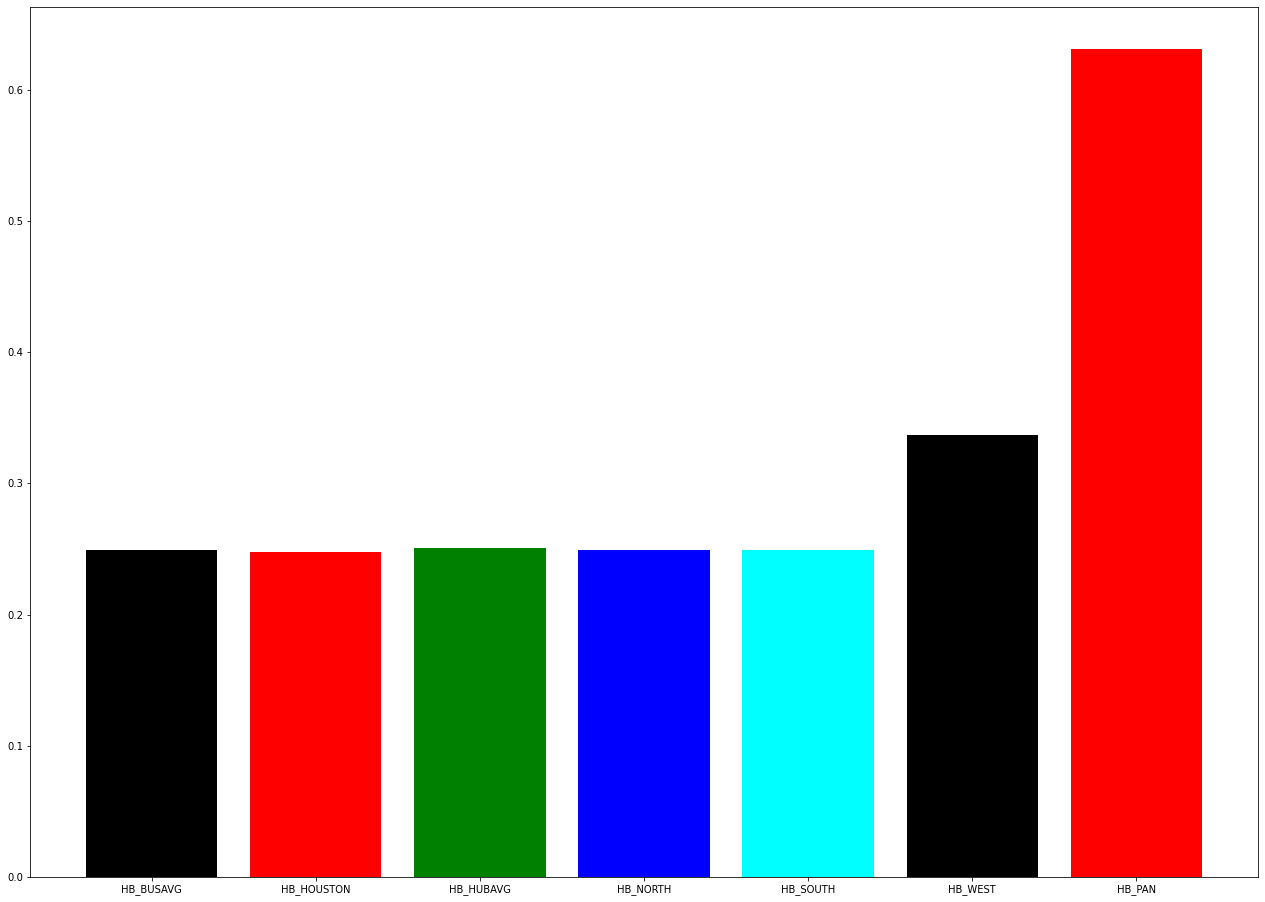

In [100]:
fig = plt.figure(figsize=(22, 16))
for year in range(2016,2020):
    xvals=HVBY[HVBY.Year==str(year)].SettlementPoint
    yvals=HVBY[HVBY.Year==str(year)].HourlyVolatility
    plt.bar(xvals,yvals,color=['black', 'red', 'green', 'blue', 'cyan'])
    filename='VolatilityPlot_'+str(year)+'.png'
    fig.savefig(filename)

Task 6

In [121]:
MV= pd.DataFrame(columns = ['SettlementPoint', 'Year', 'HourlyVolatility'])
for year in range(2016, 2020):
    curSet=HVBY[HVBY.Year==str(year)].max().SettlementPoint #finds the maximum of the year and then records the Settlement Point
    curMaxVol=HVBY[HVBY.Year==str(year)].max().HourlyVolatility
    
    row={'SettlementPoint':curSet, 'Year':str(year), 'HourlyVolatility': curMaxVol} #stores data as dictionary
    MV=MV.append(row, ignore_index = True)
MV.to_csv('MaxVolatilityByYear.csv')

Task 7

In [122]:
#initializes first row
cQF=['Variable', 'Date', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21', 'X22', 'X23', 'X24']
for i in range(len(setPointUniq)):
    #sellects current Settlement point's data
    curLoc=dfSPPrice[dfSPPrice.SettlementPoint==setPointUniq[i]]
    start=curLoc.index[0]
    end=curLoc.index[-1]
    curDates=pd.date_range(start, end, freq='D') #forms a date for every range
    curFile='spot_'+setPointUniq[i]+'.csv'
    file = open(r"/Users/ryanfoley/APPM2720/cQuant/formattedSpotHistory/"+curFile, 'w')
    writer = csv.writer(file)
    writer.writerow(cQF)
    for j in range(len(curDates)):
        
        curDay1=str(curDates[j]) #converts current date to string
        curDay=list(curLoc[curDay1[0:10]]['Price']) #uses just the date portion to select daily data
        curDay=[setPointUniq[0], curDay1[0:10]]+curDay #creates row of data using current location, current date, and hourly data
        writer.writerow(curDay) #writes to csv
    file.close()
        
        
        
        